# Example - 03 - Venus Aerocapture: Part 1

In this example, you will learn to create a vehicle object in AMAT and simulate its aerocapture trajectory in the Venusian atmosphere. 

For reference, we will re-create a few results from the paper "Craig and Lyne, Parametric Study of Aerocapture for Missions to Venus, Journal of Spacecraft and Rockets, Vol. 42, No. 6., 2005. DOI:10.2514/1.2589

Let us re-use the code from example-01, 02 to create a planet object for Venus and add an atmosphere model. In addition to Planet, import the Vehicle class from AMAT for this example.

In [1]:
from AMAT.planet import Planet
from AMAT.vehicle import Vehicle

# Create a planet object
planet=Planet("VENUS")    

# Load an nominal atmospheric profile with height, temp, pressure, density data
planet.loadAtmosphereModel('../atmdata/Venus/venus-gram-avg.dat', 0 , 1 ,2, 3)

In [2]:
# Create a vehicle object flying in the target planet atmosphere.
# with params m = 300 kg, beta = 78.0, L/D = 0.35, A = 3.1416, AoA = 0, RN = 1.54

# These values are taken from the reference article mentioned above.
vehicle=Vehicle('Apollo', 300.0, 78.0, 0.35, 3.1416, 0.0, 1.54, planet)

Set initial conditions for the vehicle at atmospheric entry interface.

In [3]:
# h0 = 180 km, LON = 0 deg, LAT = 0 deg
# v0 = 12 km/s, HDG = 0 deg, FPA = 0 deg
# DOWNRANGE0 = 0 deg, HEATLOAD0 = 0.

# See help(vehicle) for more details.
vehicle.setInitialState(180.0,0.0,0.0,12.0,0.0,-4.5,0.0,0.0)

# Set solver tolerance = 1E-6 (recommended value)
# Setting this too low can result in long execution times.
vehicle.setSolverParams(1E-6)

In [4]:
# Compute the overshoot and undershoot limit EFPA

# Set max. propogation time = 2400.0 secs.
# Set max. time step = 0.1 sec.
# Set low value for guess = -80.0 deg
# Set high value for guess = -4.0 deg
# Set EFPA tolerance = 1E-10 (recommended)
# Set target apoapsis = 407 km

# This calculation migt take a couple of minutes. Hang on!
overShootLimit, exitflag_os  = vehicle.findOverShootLimit (2400.0,0.1,-80.0,-4.0,1E-10,407.0)
underShootLimit,exitflag_us  = vehicle.findUnderShootLimit(2400.0,0.1,-80.0,-4.0,1E-10,407.0)

In [5]:
# exitflag_os and exitflag_us will be set to 1 if a solution was found. Otherwise, it will be 0.
print(exitflag_os)
print(exitflag_us)

1.0
1.0


In [6]:
# print the overshoot and undershoot limits we just computed.
print("Overshoot  limit : "+str('{:.4f}'.format(overShootLimit))+ " deg")
print("Undershoot limit : "+str('{:.4f}'.format(underShootLimit))+ " deg")

Overshoot  limit : -7.0519 deg
Undershoot limit : -9.4396 deg


These are the limiting flight path angles for our vehicle at Venus. Let us now calculate these trajectories, and their associated deceleration and heating profiles.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


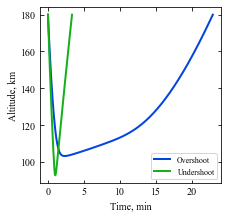

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


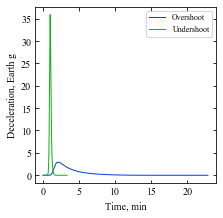

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


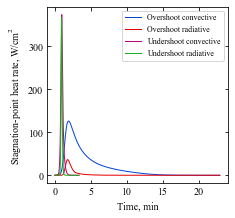

In [7]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Reset initial conditions and propogate overshoot trajectory
vehicle.setInitialState(180.0,0.0,0.0,12.0,0.0,overShootLimit,0.0,0.0)
vehicle.propogateEntry (2400.0,0.1,180.0)

# Extract and save variables to plot
t_min_os         = vehicle.t_minc
h_km_os          = vehicle.h_kmc
acc_net_g_os     = vehicle.acc_net_g
q_stag_con_os    = vehicle.q_stag_con
q_stag_rad_os    = vehicle.q_stag_rad

# Reset initial conditions and propogate undershoot trajectory
vehicle.setInitialState(180.0,0.0,0.0,12.0,0.0,underShootLimit,0.0,0.0)
vehicle.propogateEntry (2400.0,0.1,0.0)

# Extract and save variable to plot
t_min_us         = vehicle.t_minc
h_km_us          = vehicle.h_kmc
acc_net_g_us     = vehicle.acc_net_g
q_stag_con_us    = vehicle.q_stag_con
q_stag_rad_us    = vehicle.q_stag_rad

'''
Create fig #1 - altitude history of aerocapture maneuver
'''

fig = plt.figure()
fig.set_size_inches([3.25,3.25])
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)
plt.plot(t_min_os , h_km_os, linestyle='solid' , color='xkcd:blue',linewidth=2.0,  label='Overshoot')
plt.plot(t_min_us , h_km_us, linestyle='solid' , color='xkcd:green',linewidth=2.0,  label='Undershoot')

plt.xlabel('Time, min',fontsize=10)
plt.ylabel("Altitude, km",fontsize=10)

ax = plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
plt.tick_params(direction='in')
plt.tick_params(axis='x',labelsize=10)
plt.tick_params(axis='y',labelsize=10)

plt.legend(loc='lower right', fontsize=8)


plt.savefig('../plots/craig-lyne-altitude.png',bbox_inches='tight')
plt.savefig('../plots/craig-lyne-altitude.pdf', dpi=300,bbox_inches='tight')
plt.savefig('../plots/craig-lyne-altitude.eps', dpi=300,bbox_inches='tight')

plt.show()

fig = plt.figure()
fig.set_size_inches([3.25,3.25])
plt.rc('font',family='Times New Roman')
plt.plot(t_min_os , acc_net_g_os, linestyle='solid' , color='xkcd:blue',linewidth=1.0,  label='Overshoot')
plt.plot(t_min_us , acc_net_g_us, linestyle='solid' , color='xkcd:green',linewidth=1.0,  label='Undershoot')

plt.xlabel('Time, min',fontsize=10)
plt.ylabel("Deceleration, Earth g",fontsize=10)

ax = plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
plt.tick_params(direction='in')
plt.tick_params(axis='x',labelsize=10)
plt.tick_params(axis='y',labelsize=10)

plt.legend(loc='upper right', fontsize=8)


plt.savefig('../plots/craig-lyne-deceleration.png',bbox_inches='tight')
plt.savefig('../plots/craig-lyne-deceleration.pdf', dpi=300,bbox_inches='tight')
plt.savefig('../plots/craig-lyne-deceleration.eps', dpi=300,bbox_inches='tight')

plt.show()

fig = plt.figure()
fig.set_size_inches([3.25,3.25])
plt.rc('font',family='Times New Roman')
plt.plot(t_min_os , q_stag_con_os, linestyle='solid' , color='xkcd:blue',linewidth=1.0,  label='Overshoot convective')
plt.plot(t_min_os , q_stag_rad_os, linestyle='solid' , color='xkcd:red',linewidth=1.0,  label='Overshoot radiative')
plt.plot(t_min_us , q_stag_con_us, linestyle='solid' , color='xkcd:magenta',linewidth=1.0,  label='Undershoot convective')
plt.plot(t_min_us , q_stag_rad_us, linestyle='solid' , color='xkcd:green',linewidth=1.0,  label='Undershoot radiative')

plt.xlabel('Time, min',fontsize=10)
plt.ylabel("Stagnation-point heat rate, "+r'$W/cm^2$',fontsize=10)

ax = plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
plt.tick_params(direction='in')
plt.tick_params(axis='x',labelsize=10)
plt.tick_params(axis='y',labelsize=10)

plt.legend(loc='upper right', fontsize=8)


plt.savefig('../plots/craig-lyne-heating.png',bbox_inches='tight')
plt.savefig('../plots/craig-lyne-heating.pdf', dpi=300,bbox_inches='tight')
plt.savefig('../plots/craig-lyne-heating.eps', dpi=300,bbox_inches='tight')

plt.show()

The plots are now saved in plots/craig-lyne-* and should match with the results from the paper.

**Congratulations!** You have simulated an aerocapture vehicle flying in the Venusian atmosphere. In the next tutorial, we will compute the corridor widths for drag modulation aerocapture at Venus.